In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold


%matplotlib inline

In [2]:
wine=pd.read_csv("winequality-red.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#분류를 위해 quality를 두가지 범주로 나눠준다.
wine['quality']=pd.cut(wine['quality'],bins=(2,6.5,8),labels=['bad','good'])
label_quality=LabelEncoder()
wine['quality']=label_quality.fit_transform(wine['quality'])

In [7]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

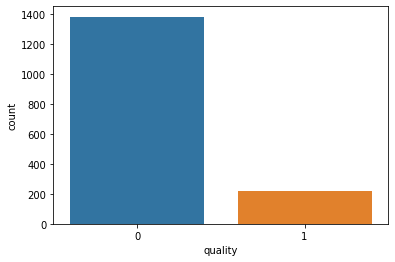

In [8]:
sns.countplot(wine['quality'])

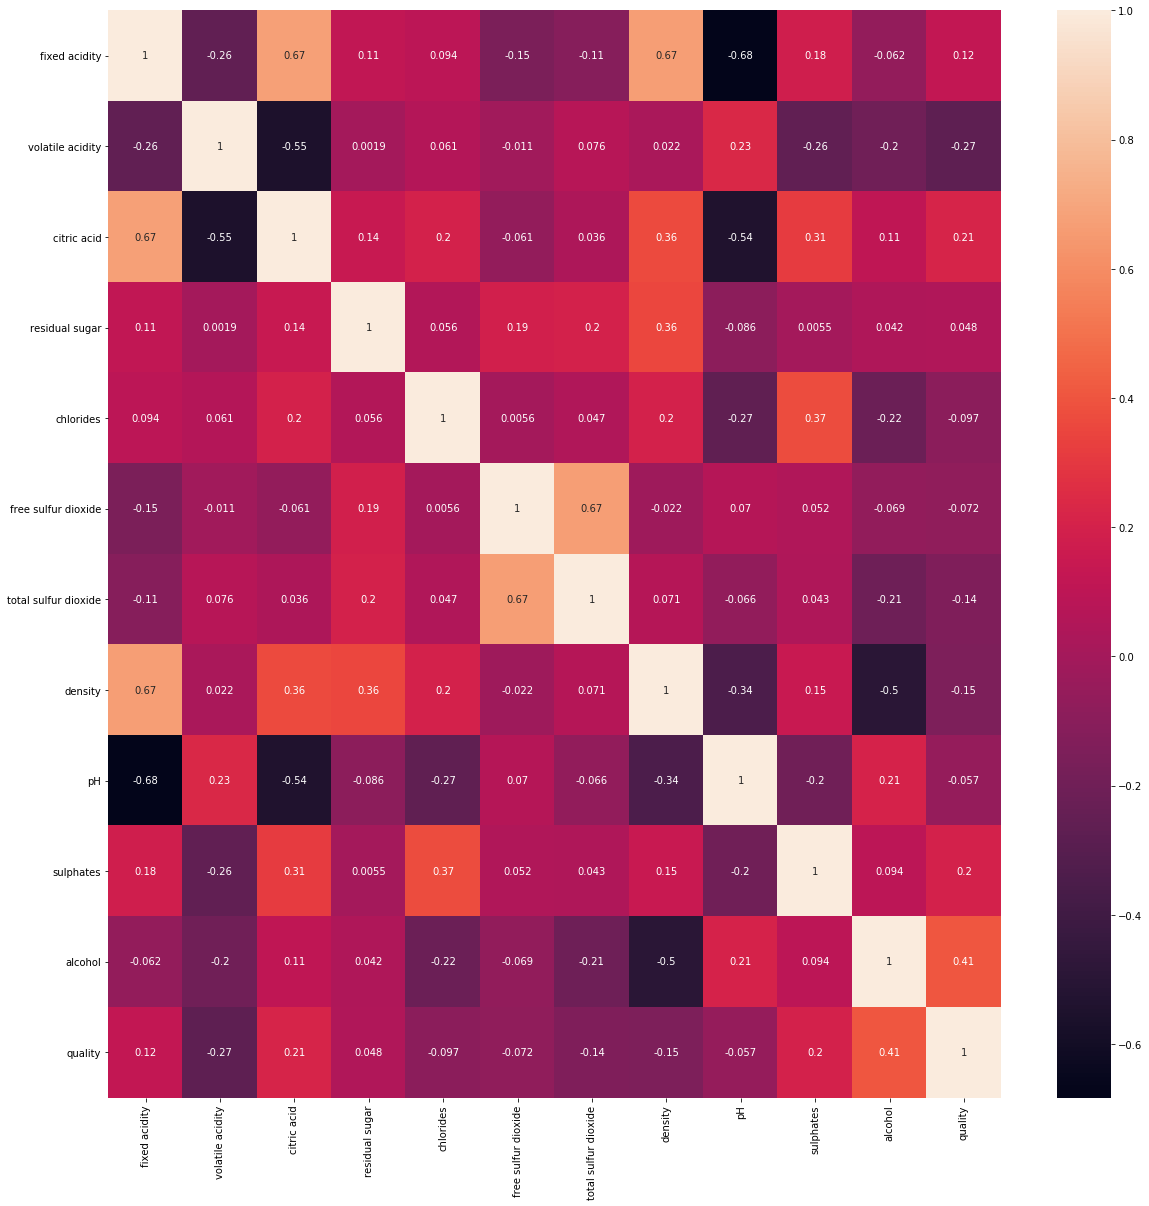

In [9]:
fig=plt.figure(figsize=(20,20))
sns.heatmap(wine.corr(),annot=True)

In [10]:
wine=pd.get_dummies(wine,drop_first=True)
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [11]:
wine_data=wine.drop('quality',axis=1)
wine_target=wine['quality']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(wine_data,wine_target,test_size=0.2, 
                                               random_state=121,stratify=wine_target)

In [13]:
#standardscaler로 평균이 0 표준편차가 1으로 만들어준다
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [14]:
def crossval(datax,datay,model,cv=3):
    score=cross_val_score(model,datax,datay,cv=cv,scoring='accuracy')
    return(np.mean(score))
def plotting(ytest,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold=precision_recall_curve(ytest,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title('Average Precision Score:{}'.format(average_precision_score(ytest,pred[:,1])))
    fpr,tpr,threshold=roc_curve(ytest,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is:{}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

Random Forest Classifier

In [15]:
rf=RandomForestClassifier(n_estimators=200,random_state=121)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)

In [16]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.77      0.47      0.58        43

    accuracy                           0.91       320
   macro avg       0.85      0.72      0.76       320
weighted avg       0.90      0.91      0.90       320



Accuracy is : 0.902260557882816


Text(0.5, 1, 'f1 score=0.5797101449275363')

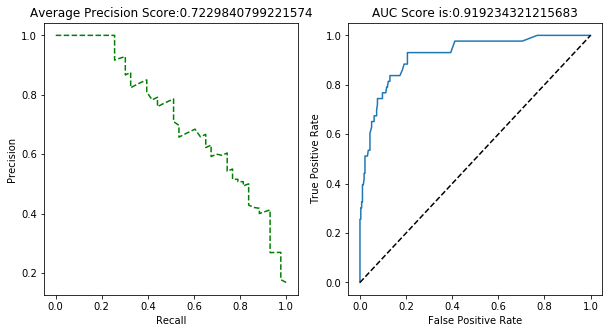

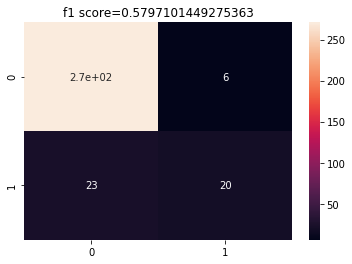

In [22]:
score_rf=crossval(x_train,y_train,rf)
print('Accuracy is :',score_rf)
plotting(y_test,rf.predict_proba(x_test))
fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,rf.predict(x_test)),annot=True)
f1_score=metrics.f1_score(y_test,rf.predict(x_test))
plt.title('f1 score={}'.format(f1_score))

Text(0.5, 1.0, 'Feature Importances')

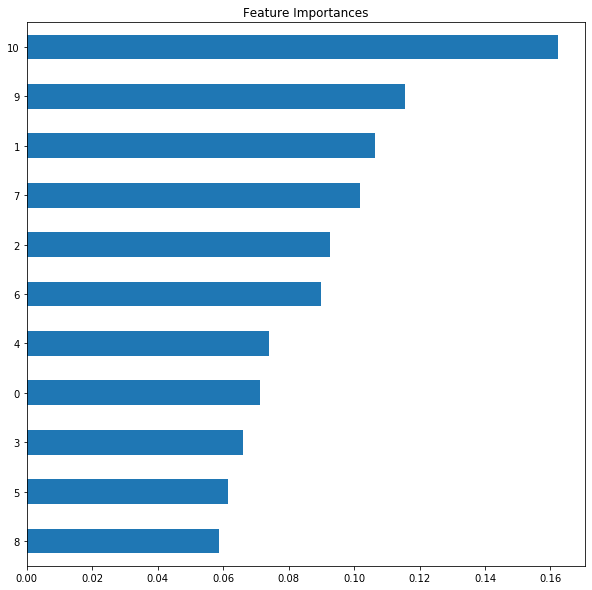

In [23]:
fig=plt.figure(figsize=(10,10))
x=pd.DataFrame(x_train)
important=pd.Series(rf.feature_importances_,index=x.columns)
important.sort_values().plot.barh()
plt.title('Feature Importances')

Decision tree classifier

In [24]:
dt=DecisionTreeClassifier(max_depth=6,random_state=121)
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)

In [25]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       277
           1       0.57      0.53      0.55        43

    accuracy                           0.88       320
   macro avg       0.75      0.74      0.74       320
weighted avg       0.88      0.88      0.88       320



accuracy score is : 0.8733292285589677


Text(0.5, 1, 'f1 score=0.5542168674698795')

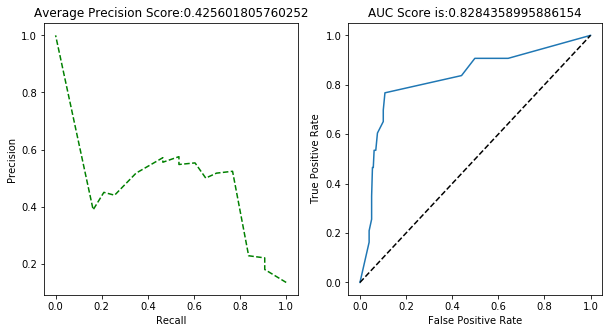

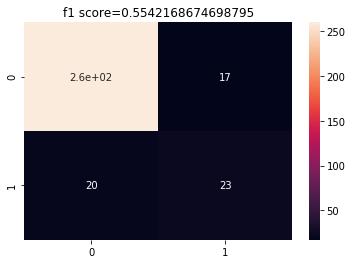

In [26]:
score_dt=crossval(x_train,y_train,dt)
print('accuracy score is :',score_dt)
dt.fit(x_train,y_train)
plotting(y_test,dt.predict_proba(x_test))
fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,dt.predict(x_test)),annot=True)
f1_score=metrics.f1_score(y_test,dt.predict(x_test))
plt.title('f1 score={}'.format(f1_score))

logistic regression

Accuracy is : 0.8733328935360799


Text(0.5, 1, 'f1 score is=0.4776119402985074')

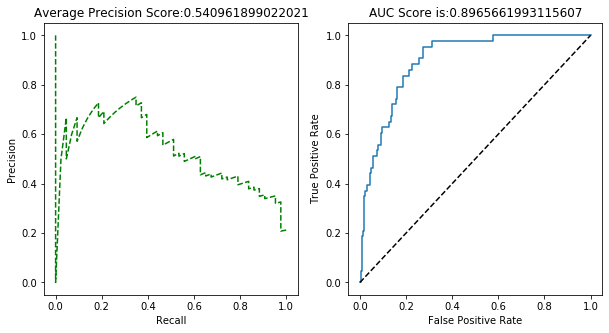

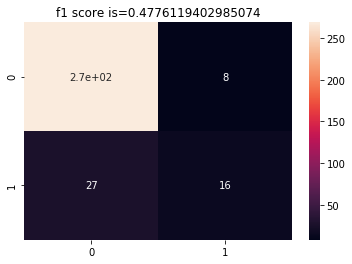

In [27]:
lr=LogisticRegression()
score_lr=crossval(x_train,y_train,lr)
print('Accuracy is :',score_lr)
lr.fit(x_train,y_train)
plotting(y_test,lr.predict_proba(x_test))
fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,lr.predict(x_test)),annot=True)
f1_score=metrics.f1_score(y_test,lr.predict(x_test))
plt.title('f1 score is={}'.format(f1_score))

In [29]:
dt_clf = DecisionTreeClassifier(random_state=156)

kfold = KFold(n_splits=5)
cv_accuracy = []

wine_data = wine_data.values

n_iter = 0

for train_index, test_index in kfold.split(wine_data):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    y_train, y_test = wine_target[train_index], wine_target[test_index]
    x_train, x_test = wine_data[train_index], wine_data[test_index]

    # 학습 및 예측
    dt_clf.fit(x_train, y_train)
    pred = dt_clf.predict(x_test)
    n_iter += 1

    # 반복할 때 마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]

    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))

    cv_accuracy.append(accuracy)

# 평균 kfold 정확도
print("\n## 교차 검증별 정확도:", cv_accuracy)
print("## 평균 검증 정확도:", np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.9281, 학습 데이터 크기: 1279, 검증 데이터 크기: 320
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229